***
Respostas

## 1. a)


### Carregar dados do GEO

In [ ]:
rm(list=ls())

In [12]:
library(GEOquery)
library(ewastools)
system("mkdir -p /home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276")
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276")

date="June4th2024"
dataDirectory <- (".")

### Primeiro - GSE191276

In [13]:
gse <- getGEO("GSE191276", GSEMatrix = TRUE)
show(gse)


Found 1 file(s)

GSE191276_series_matrix.txt.gz

Rows: 776062 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ID_REF
dbl (7): GSM5742874, GSM5742875, GSM5742876, GSM5742877, GSM5742878, GSM5742...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
File stored at: 

/tmp/Rtmp4CQIgh/GPL23976.soft



$GSE191276_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 776062 features, 7 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM5742874 GSM5742875 ... GSM5742880 (7 total)
  varLabels: title geo_accession ... Sex:ch1 (39 total)
  varMetadata: labelDescription
featureData
  featureNames: cg00000029 cg00000109 ... ch.9.991104F (776062 total)
  fvarLabels: ID SPOT_ID
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 35094088 
Annotation: GPL23976 



In [18]:

# Obtendo a tabela de fenótipos disponível no GEO (obter informações sobre sexo biológico)
pheno.df <- pData(phenoData(gse[[1]]))

head(pheno.df)
colnames(pheno.df)
#Armazenar a informação de sexo biológico para adicionar na phenotype sheet
pheno.df_sub <- subset(pheno.df, select = c("age (years):ch1","Sex:ch1","case control status:ch1","self-declared ancestry:ch1"))
pheno.df_sub

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_zip/postal_code,contact_country,supplementary_file,supplementary_file.1,data_row_count,age (years):ch1,case control status:ch1,participant type:ch1,self-declared ancestry:ch1,Sex:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM5742874,pooled_PC,GSM5742874,Public on Mar 01 2022,Dec 20 2021,Mar 02 2022,genomic,1,Whole blood,Homo sapiens,case control status: Pooled controls,⋯,M20 4BX,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742874/suppl/GSM5742874_202702240141_R05C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742874/suppl/GSM5742874_202702240141_R05C01_Red.idat.gz,776062,NA,Pooled controls,Pooled parent controls,NA,NA
GSM5742875,5767-P,GSM5742875,Public on Mar 01 2022,Dec 20 2021,Mar 02 2022,genomic,1,Whole blood,Homo sapiens,case control status: Case,⋯,M20 4BX,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742875/suppl/GSM5742875_202702240141_R06C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742875/suppl/GSM5742875_202702240141_R06C01_Red.idat.gz,776062,17.8,Case,Proband,Asian,F
GSM5742876,8658-P,GSM5742876,Public on Mar 01 2022,Dec 20 2021,Mar 02 2022,genomic,1,Whole blood,Homo sapiens,case control status: Case,⋯,M20 4BX,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742876/suppl/GSM5742876_202702240141_R08C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742876/suppl/GSM5742876_202702240141_R08C01_Red.idat.gz,776062,27,Case,Proband,White,M
GSM5742877,3425-P,GSM5742877,Public on Mar 01 2022,Dec 20 2021,Mar 02 2022,genomic,1,Whole blood,Homo sapiens,case control status: Case,⋯,M20 4BX,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742877/suppl/GSM5742877_204088150175_R01C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742877/suppl/GSM5742877_204088150175_R01C01_Red.idat.gz,776062,20.9,Case,Proband,Asian,M
GSM5742878,F-16-20,GSM5742878,Public on Mar 01 2022,Dec 20 2021,Mar 02 2022,genomic,1,Whole blood,Homo sapiens,case control status: Control,⋯,M20 4BX,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742878/suppl/GSM5742878_204088150175_R02C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742878/suppl/GSM5742878_204088150175_R02C01_Red.idat.gz,776062,18.5,Control,Age and sex matched donor,Unknown (Anonymous blood donor),F
GSM5742879,M-19-23,GSM5742879,Public on Mar 01 2022,Dec 20 2021,Mar 02 2022,genomic,1,Whole blood,Homo sapiens,case control status: Control,⋯,M20 4BX,United Kingdom,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742879/suppl/GSM5742879_204088150175_R03C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5742nnn/GSM5742879/suppl/GSM5742879_204088150175_R03C01_Red.idat.gz,776062,21,Control,Age and sex matched donor,Unknown (Anonymous blood donor),M


[1] "title"                      "geo_accession"             
 [3] "status"                     "submission_date"           
 [5] "last_update_date"           "type"                      
 [7] "channel_count"              "source_name_ch1"           
 [9] "organism_ch1"               "characteristics_ch1"       
[11] "characteristics_ch1.1"      "characteristics_ch1.2"     
[13] "characteristics_ch1.3"      "characteristics_ch1.4"     
[15] "molecule_ch1"               "extract_protocol_ch1"      
[17] "label_ch1"                  "label_protocol_ch1"        
[19] "taxid_ch1"                  "hyb_protocol"              
[21] "scan_protocol"              "description"               
[23] "data_processing"            "platform_id"               
[25] "contact_name"               "contact_email"             
[27] "contact_institute"          "contact_address"           
[29] "contact_city"               "contact_zip/postal_code"   
[31] "contact_country"            "supplementary_file"        
[33] "supplementary_file.1"       "data_row_count"            
[35] "age (years):ch1"            "case control status:ch1"   
[37] "participant type:ch1"       "self-declared ancestry:ch1"
[39] "Sex:ch1"

,age (years):ch1,Sex:ch1,case control status:ch1,self-declared ancestry:ch1
,<chr>,<chr>,<chr>,<chr>
GSM5742874,NA,NA,Pooled controls,NA
GSM5742875,17.8,F,Case,Asian
GSM5742876,27,M,Case,White
GSM5742877,20.9,M,Case,Asian
GSM5742878,18.5,F,Control,Unknown (Anonymous blood donor)
GSM5742879,21,M,Control,Unknown (Anonymous blood donor)
GSM5742880,25,M,Control,Unknown (Anonymous blood donor)


In [15]:
options(timeout = max(300, getOption("timeout")))
options(download.file.method.GEOquery = "wget")
filePaths<- getGEOSuppFiles("GSE191276")

In [16]:
filePaths

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSE191276/GSE191276_Matrix_signal_intensities.txt.gz,41838553,FALSE,664,2021-12-20 13:09:47,2024-06-23 19:14:08,2024-06-23 19:14:08,1000,1000,iago,iago
/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE191276/GSE191276/GSE191276_RAW.tar,103802880,FALSE,664,2022-03-02 19:51:15,2024-06-23 19:14:24,2024-06-23 19:14:24,1000,1000,iago,iago


In [112]:
####################################
# Descompactar arquivos 
####################################
system("tar -xvf ./GSE191276_RAW.tar")

system("gunzip ./*idat.gz")

In [19]:
####################################
# criando sheet 
####################################


idat_filelist <- list()

for( file in list.files(dataDirectory, recursive = TRUE) ){
 if(endsWith(file, ".idat")){
     idat_filelist <- c(idat_filelist, file)
     }
}
head(idat_filelist)

[[1]]
[1] "GSE191276/GSM5742874_202702240141_R05C01_Grn.idat"

[[2]]
[1] "GSE191276/GSM5742874_202702240141_R05C01_Red.idat"

[[3]]
[1] "GSE191276/GSM5742875_202702240141_R06C01_Grn.idat"

[[4]]
[1] "GSE191276/GSM5742875_202702240141_R06C01_Red.idat"

[[5]]
[1] "GSE191276/GSM5742876_202702240141_R08C01_Grn.idat"

[[6]]
[1] "GSE191276/GSM5742876_202702240141_R08C01_Red.idat"

In [26]:
#Create a matrix for the phenofile
sheet = as.matrix(matrix(nrow = length(idat_filelist), ncol = 5))
colnames(sheet) =c("GeoID","SampleID","Basename","Sentrix_ID","Sentrix_Position")

In [27]:
sheet


GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [28]:
for (i in seq(1,length(idat_filelist))){
    split_name=strsplit(idat_filelist[[i]], split='_', fixed=TRUE)

    #GeoID
    sheet[i,1] = split_name[[1]][1]
    #SampleID
    sheet[i,2]=paste(split_name[[1]][2],split_name[[1]][3],sep="_")
    #Basename
    #   Obs: incluir o caminho de onde os arquivos idat estão salvos, nesse caso, é nosso working directory. 
    #        > getwd() 
    #        [1] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata"
    sheet[i,3]=paste(split_name[[1]][1],split_name[[1]][2],split_name[[1]][3],sep="_")
    #Sentrix_ID
    sheet[i,4]=split_name[[1]][2]
    #SentrixPosition
    sheet[i,5]=split_name[[1]][3]
    }

#Sheet está duplicada, já que temos um idat para cada canal 
sheet = sheet[duplicated(sheet),]

In [29]:
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position
GSE191276/GSM5742874,202702240141_R05C01,GSE191276/GSM5742874_202702240141_R05C01,202702240141,R05C01
GSE191276/GSM5742875,202702240141_R06C01,GSE191276/GSM5742875_202702240141_R06C01,202702240141,R06C01
GSE191276/GSM5742876,202702240141_R08C01,GSE191276/GSM5742876_202702240141_R08C01,202702240141,R08C01
GSE191276/GSM5742877,204088150175_R01C01,GSE191276/GSM5742877_204088150175_R01C01,204088150175,R01C01
GSE191276/GSM5742878,204088150175_R02C01,GSE191276/GSM5742878_204088150175_R02C01,204088150175,R02C01
GSE191276/GSM5742879,204088150175_R03C01,GSE191276/GSM5742879_204088150175_R03C01,204088150175,R03C01
GSE191276/GSM5742880,204088150175_R04C01,GSE191276/GSM5742880_204088150175_R04C01,204088150175,R04C01
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01


In [30]:
head(pheno.df_sub)
sheet <- merge(x=sheet, y=pheno.df_sub, by.x = "GeoID", by.y = "row.names")

colnames(sheet) <- c("GeoID","SampleID","Basename","Sentrix_ID",
                     "Sentrix_Position","Age","Sex","case-control","ancestry")

#OBS nesta planilha a coluna de informação sexo biológico já está formatada como M e F 
sheet

#sheet
sheet$Sex <- ifelse(sheet$Sex %in% c("M","F"),sheet$Sex, "undef")

sheet

,age (years):ch1,Sex:ch1,case control status:ch1,self-declared ancestry:ch1
,<chr>,<chr>,<chr>,<chr>
GSM5742874,NA,NA,Pooled controls,NA
GSM5742875,17.8,F,Case,Asian
GSM5742876,27,M,Case,White
GSM5742877,20.9,M,Case,Asian
GSM5742878,18.5,F,Control,Unknown (Anonymous blood donor)
GSM5742879,21,M,Control,Unknown (Anonymous blood donor)


GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case-control,ancestry
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,NA,Pooled controls,NA
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27,M,Case,White
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor)
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21,M,Control,Unknown (Anonymous blood donor)
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25,M,Control,Unknown (Anonymous blood donor)


GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Age,Sex,case-control,ancestry
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA,undef,Pooled controls,NA
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,17.8,F,Case,Asian
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,27,M,Case,White
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,20.9,M,Case,Asian
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,18.5,F,Control,Unknown (Anonymous blood donor)
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,21,M,Control,Unknown (Anonymous blood donor)
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,25,M,Control,Unknown (Anonymous blood donor)


In [32]:
write.csv(sheet, file = "phenotype_file_GSE191276.csv", quote=F, row.names= F)

***
### Agora, faremos do segundo pheno - GSE235207

In [37]:
rm(list=ls())

In [38]:
library(GEOquery)
library(ewastools)
system("mkdir -p /home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE235207")
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE235207")

date="June4th2024"
dataDirectory <- (".")

In [39]:
gse <- getGEO("GSE235207", GSEMatrix = TRUE)
show(gse)

Found 1 file(s)

GSE235207_series_matrix.txt.gz

Using locally cached version: /tmp/Rtmp4CQIgh/GSE235207_series_matrix.txt.gz

Rows: 865918 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ID_REF
dbl (4): GSM7496815, GSM7496816, GSM7496817, GSM7496818

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Using locally cached version of GPL21145 found here:
/tmp/Rtmp4CQIgh/GPL21145.soft 

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


$GSE235207_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 865918 features, 4 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM7496815 GSM7496816 GSM7496817 GSM7496818
  varLabels: title geo_accession ... RNAi:ch1 (38 total)
  varMetadata: labelDescription
featureData
  featureNames: cg00000029 NA ... rs9839873 (865918 total)
  fvarLabels: ID SPOT_ID ... SourceSeq (14 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 38481314 
Annotation: GPL21145 



In [40]:

# Obtendo a tabela de fenótipos disponível no GEO (obter informações sobre sexo biológico)
pheno.df <- pData(phenoData(gse[[1]]))

head(pheno.df)
colnames(pheno.df)
#Armazenar a informação de sexo biológico para adicionar na phenotype sheet


,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,supplementary_file.1,data_row_count,cell line:ch1,cell type:ch1,RNAi:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM7496815,ShScramble_1,GSM7496815,Public on Mar 20 2024,Jun 20 2023,Mar 20 2024,genomic,1,Control glioblastoma cells,Homo sapiens,cell line: U87-EGFRvIII,⋯,Shinjuku,Tokyo,162-8666,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496815/suppl/GSM7496815_204289510131_R05C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496815/suppl/GSM7496815_204289510131_R05C01_Red.idat.gz,865918,U87-EGFRvIII,glioblastoma cell line,Scramble
GSM7496816,ShScramble_2,GSM7496816,Public on Mar 20 2024,Jun 20 2023,Mar 20 2024,genomic,1,Control glioblastoma cells,Homo sapiens,cell line: U87-EGFRvIII,⋯,Shinjuku,Tokyo,162-8666,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496816/suppl/GSM7496816_204289510131_R06C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496816/suppl/GSM7496816_204289510131_R06C01_Red.idat.gz,865918,U87-EGFRvIII,glioblastoma cell line,Scramble
GSM7496817,ShRictor_1,GSM7496817,Public on Mar 20 2024,Jun 20 2023,Mar 20 2024,genomic,1,mTORC2-suppressed glioblastoma cells,Homo sapiens,cell line: U87-EGFRvIII,⋯,Shinjuku,Tokyo,162-8666,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496817/suppl/GSM7496817_204289510131_R07C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496817/suppl/GSM7496817_204289510131_R07C01_Red.idat.gz,865918,U87-EGFRvIII,glioblastoma cell line,Rictor
GSM7496818,ShRictor_2,GSM7496818,Public on Mar 20 2024,Jun 20 2023,Mar 20 2024,genomic,1,mTORC2-suppressed glioblastoma cells,Homo sapiens,cell line: U87-EGFRvIII,⋯,Shinjuku,Tokyo,162-8666,Japan,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496818/suppl/GSM7496818_204289510131_R08C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM7496nnn/GSM7496818/suppl/GSM7496818_204289510131_R08C01_Red.idat.gz,865918,U87-EGFRvIII,glioblastoma cell line,Rictor


[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "treatment_protocol_ch1"  "growth_protocol_ch1"    
[15] "molecule_ch1"            "extract_protocol_ch1"   
[17] "label_ch1"               "label_protocol_ch1"     
[19] "taxid_ch1"               "hyb_protocol"           
[21] "scan_protocol"           "data_processing"        
[23] "platform_id"             "contact_name"           
[25] "contact_email"           "contact_department"     
[27] "contact_institute"       "contact_address"        
[29] "contact_city"            "contact_state"          
[31] "contact_zip/postal_code" "contact_country"        
[33] "supplementary_file"      "supplementary_file.1"   
[35] "data_row_count"          "cell line:ch1"          
[37] "cell type:ch1"           "RNAi:ch1"

[1] "Control glioblastoma cells"          
[2] "Control glioblastoma cells"          
[3] "mTORC2-suppressed glioblastoma cells"
[4] "mTORC2-suppressed glioblastoma cells"

In [42]:

caco.df <- subset(pheno.df, select = "source_name_ch1")
caco.df

,source_name_ch1
,<chr>
GSM7496815,Control glioblastoma cells
GSM7496816,Control glioblastoma cells
GSM7496817,mTORC2-suppressed glioblastoma cells
GSM7496818,mTORC2-suppressed glioblastoma cells


In [124]:
options(timeout = max(300, getOption("timeout")))
options(download.file.method.GEOquery = "wget")
filePaths<- getGEOSuppFiles("GSE235207")

In [125]:
filePaths

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE235207/GSE235207/GSE235207_RAW.tar,225832960,FALSE,664,2024-03-20 10:02:26,2024-06-22 11:29:05,2024-06-22 11:29:05,1000,1000,iago,iago


In [126]:
getwd()

[1] "/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/GSE235207"

In [127]:
####################################
# Descompactar arquivos 
####################################
system("tar -xvf ./GSE235207/GSE235207_RAW.tar")

system("gunzip ./*idat.gz")

In [82]:
####################################
# criando sheet 
####################################


idat_filelist <- list()

for( file in list.files(getwd(), recursive = TRUE) ){
 if(endsWith(file, ".idat")){
     idat_filelist <- c(idat_filelist, file)
     }
}
head(idat_filelist)

[[1]]
[1] "GSM7496815_204289510131_R05C01_Grn.idat"

[[2]]
[1] "GSM7496815_204289510131_R05C01_Red.idat"

[[3]]
[1] "GSM7496816_204289510131_R06C01_Grn.idat"

[[4]]
[1] "GSM7496816_204289510131_R06C01_Red.idat"

[[5]]
[1] "GSM7496817_204289510131_R07C01_Grn.idat"

[[6]]
[1] "GSM7496817_204289510131_R07C01_Red.idat"

In [83]:
#Create a matrix for the phenofile
sheet = as.matrix(matrix(nrow = length(idat_filelist), ncol = 5))
colnames(sheet) =c("GeoID","SampleID","Basename","Sentrix_ID","Sentrix_Position")

In [84]:
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [85]:
for (i in seq(1,length(idat_filelist))){
    split_name=strsplit(idat_filelist[[i]], split='_', fixed=TRUE)

    #GeoID
    sheet[i,1] = split_name[[1]][1]
    #SampleID
    sheet[i,2]=paste(split_name[[1]][2],split_name[[1]][3],sep="_")
    #Basename
    #   Obs: incluir o caminho de onde os arquivos idat estão salvos, nesse caso, é nosso working directory. 
    #        > getwd() 
    #        [1] "/home/iago/Documents/Epigenetica_curso_pipeline/GEOdata"
    sheet[i,3]=paste(split_name[[1]][1],split_name[[1]][2],split_name[[1]][3],sep="_")
    #Sentrix_ID
    sheet[i,4]=split_name[[1]][2]
    #SentrixPosition
    sheet[i,5]=split_name[[1]][3]
    }

#Sheet está duplicada, já que temos um idat para cada canal 
sheet = sheet[duplicated(sheet),]

In [86]:
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position
GSM7496815,204289510131_R05C01,GSM7496815_204289510131_R05C01,204289510131,R05C01
GSM7496816,204289510131_R06C01,GSM7496816_204289510131_R06C01,204289510131,R06C01
GSM7496817,204289510131_R07C01,GSM7496817_204289510131_R07C01,204289510131,R07C01
GSM7496818,204289510131_R08C01,GSM7496818_204289510131_R08C01,204289510131,R08C01


In [87]:
#Esse conjunto de dados não possui informações de sexo, iremos inventar apenas para fins de exemplo
sheet <- merge(x=sheet, y=caco.df, by.x = "GeoID", by.y = "row.names")
sheet <- cbind(sheet, data.frame("Sex" = c("M", "F", "F", "M")))
colnames(sheet) <- c("GeoID", "SampleID", "Basename", "Sentrix_ID", "Sentrix_Position", "case-control", "Sex")
#OBS nesta planilha a coluna de informação sexo biológico já está formatada como M e F 
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,case-control,Sex
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM7496815,204289510131_R05C01,GSM7496815_204289510131_R05C01,204289510131,R05C01,Control glioblastoma cells,M
GSM7496816,204289510131_R06C01,GSM7496816_204289510131_R06C01,204289510131,R06C01,Control glioblastoma cells,F
GSM7496817,204289510131_R07C01,GSM7496817_204289510131_R07C01,204289510131,R07C01,mTORC2-suppressed glioblastoma cells,F
GSM7496818,204289510131_R08C01,GSM7496818_204289510131_R08C01,204289510131,R08C01,mTORC2-suppressed glioblastoma cells,M


In [88]:
write.csv(sheet, file = "./phenotype_file_GSE235207.csv", quote=F, row.names= F)

***
### Exercício 2
Juntar phenofiles e .idat em 1 só lugar

In [1]:
library(GEOquery)
library(ewastools)
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")

dataDirectory <- (".")

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [2]:
# Copiar os idats de ambos os lugares para a o pasta exercícios

system("cp GSE*/*.idat ~/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")
sys

In [5]:
# Carregar as duas tabelas de fenótipos e agrupar 
sheet1 <- read.csv("GSE191276/phenotype_file_GSE191276.csv")
sheet1[1:3,]
sheet2 <- read.csv("GSE235207/phenotype_file_GSE235207.csv")
sheet2[1:3,]


,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,undef
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,M


,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GSM7496815,204289510131_R05C01,GSM7496815_204289510131_R05C01,204289510131,R05C01,M
2,GSM7496816,204289510131_R06C01,GSM7496816_204289510131_R06C01,204289510131,R06C01,F
3,GSM7496817,204289510131_R07C01,GSM7496817_204289510131_R07C01,204289510131,R07C01,F


In [9]:
# Usaremos rbind para agrupar as duas sheet

sheet <- rbind(sheet1,sheet2)
sheet

dim(sheet)

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,undef
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,M
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,M
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,F
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,M
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,M
GSM7496815,204289510131_R05C01,GSM7496815_204289510131_R05C01,204289510131,R05C01,M
GSM7496816,204289510131_R06C01,GSM7496816_204289510131_R06C01,204289510131,R06C01,F


[1] 11  6

In [10]:
write.csv(sheet,"phenotype_file_ex3.csv", row.names=F)

***
# ewastools

In [4]:
sheet = read.csv("./phenotype_file_ex3.csv", header= T)

head(sheet)


,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,NA
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,M
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,M
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,F
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,M


***
#### Leitura de idats



In [12]:
head(paste(dataDirectory,sheet$Basename,sep="/"))

### Moditicar o BASENAME para ter o caminho em que os .idat estão salvos
if("methdata.RData" %in% list.files("./")){
    load("./methdata.RData")
    print("Meth file loaded.")
    }else{
    meth = read_idats(paste(dataDirectory,sheet$Basename,sep = "/"))
    save(meth, file="./methdata.RData")
    }


[1] "./GSM5742874_202702240141_R05C01" "./GSM5742875_202702240141_R06C01"
[3] "./GSM5742876_202702240141_R08C01" "./GSM5742877_204088150175_R01C01"
[5] "./GSM5742878_204088150175_R02C01" "./GSM5742879_204088150175_R03C01"

[1] "Meth file loaded."


In [14]:
meth$manifest[1:5,]

probe_id,addressU,addressM,channel,next_base,chr,mapinfo,strand,probe_type,index,OOBi,Ui,Mi
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<fct>,<chr>,<int>,<int>,<int>,<int>
rs10796216,84632581,77745366,Red,A,,NA,,rs,1,1,838118,750746
rs2468330,55653201,NA,Both,,,NA,,rs,2,NA,536579,536579
rs213028,31661197,3637210,Red,T,,NA,,rs,3,2,317324,29821
rs951295,1777132,81605941,Grn,C,,NA,,rs,4,1,11371,796811
rs877309,79696145,NA,Both,,,NA,,rs,5,NA,774881,774881


***
#### Aplicando as control metrics
 * função control metrics
 * predict_sex()

In [17]:
sheet = as.data.table(sheet)
sheet[,exclude:=FALSE]
meth %>% control_metrics %>% sample_failure -> sheet$failed
fails <- subset(sheet, failed == "TRUE")
message("Failed Samples: ", nrow(fails))

Failed Samples: 0



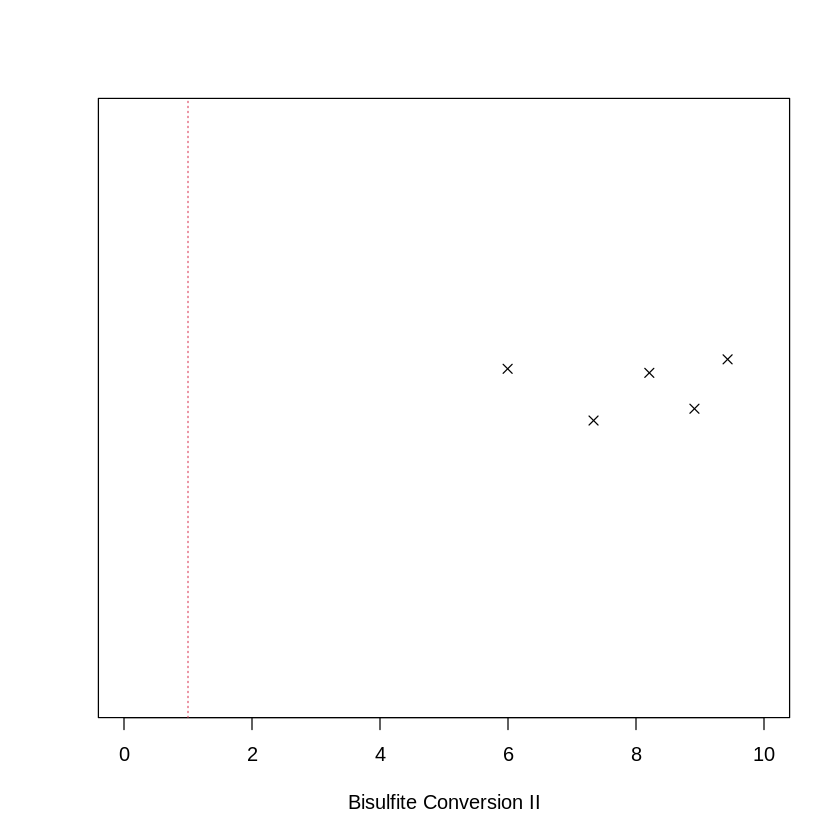

In [45]:
ctrls = control_metrics(meth)
stripchart(ctrls$`Bisulfite Conversion II`,method="jitter",pch=4,xlab='Bisulfite Conversion II',xlim=c(0,10))
abline(v=1,col=2,lty=3)

In [46]:
sheet$failed = sample_failure(ctrls)
table(sheet$failed)


FALSE 
    7 

F     M 
130.5 534.0

   
    m f
  F 0 2
  M 4 0

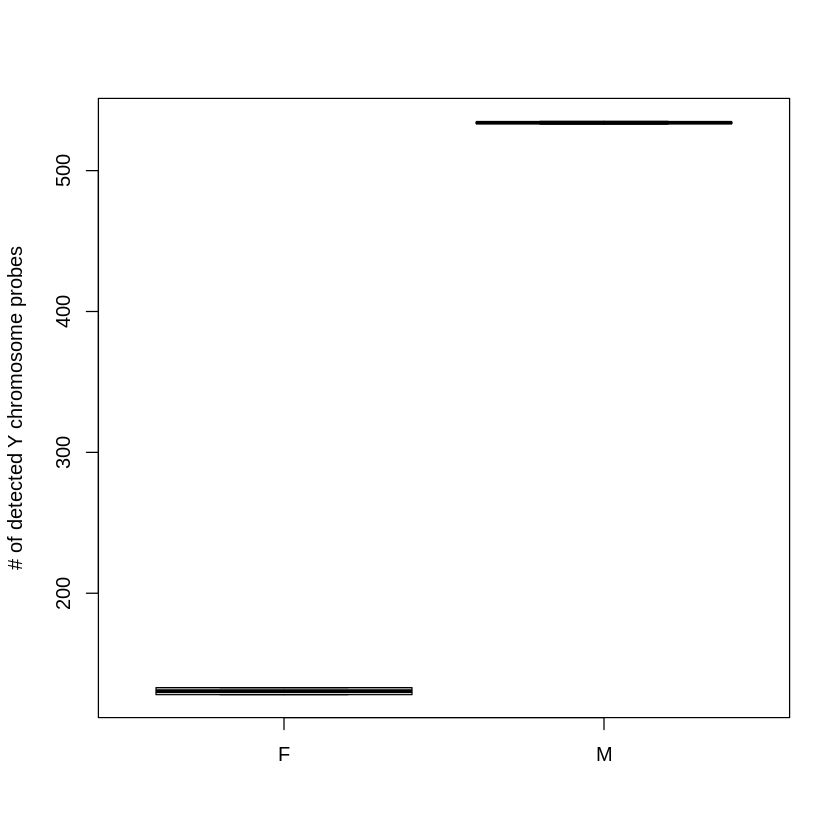

In [47]:
# 1. Obter o detectionP dos dados de metilação originais
detP = meth$detP[chrY,]

# 2. Calcular a quantidade das colunas de detP de cada indivíduo que obtem valor menor que 0.01 para o cromossomo Y
detP = colSums(detP<0.01,na.rm=TRUE)

# 3. Realizar um boxplot mostrando a distribução de detP < 0.01 em homens e mulheres ( de acordo com sexo biológico autodeclarado)
boxplot(split(detP,sheet$Sex),ylab="# of detected Y chromosome probes")

# 4. Calcuando a mediana das distribuições nas subamostras de homens e mulhres
split(detP,sheet$Sex) %>% sapply(median)


#------------------------------------------
#Aplicando as funções check_sex e predict_sex
sexpred = check_sex(meth) 
PredSex = predict_sex(sexpred$X, sexpred$Y)

sheet$predSex_X = sexpred$X
sheet$predSex_Y = sexpred$Y
sheet$predSex = PredSex

table(sheet$Sex,sheet$predSex)

***
#### Omitir probes que estiverem com mediana de detP < 0.01 

In [41]:
beta = meth %>% ewastools::mask(0.01)

In [42]:
typeof(beta)


[1] "list"

In [43]:
beta %<>% correct_dye_bias

In [44]:
beta %<>% ewastools::dont_normalize()

save(beta,file="./raw_beta.RData")

rm(beta)

In [66]:
rm(list=ls())

***
# Minfi

In [67]:
library(minfi)

library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)

In [82]:
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")
basedir = getwd()
date="June4th2024"
dataDirectory <- ("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")

In [83]:
sheet=read.csv(file.path(dataDirectory, "phenotype_file.csv"))
head(sheet)

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,undef
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,M
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,M
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,F
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,M


In [ ]:
if (file.exists("./minfiRGset.RData")){
    load("./minfiRGset.RData")
} else{
    setwd(dataDirectory)
    RGSet <- minfi::read.metharray.exp(targets = sheet, verbose = FALSE)
    save(RGSet, file = "./minfiRGset.RData")
}

### Busca por sex mismacthes

In [84]:
predSex <-  getSex(GMRset)
predSex
sheet$predictedSex <- predSex$predictedSex

sheet$Sex <-  toupper(sheet$Sex)



if(!all(sheet$Sex == sheet$predictedSex)){
    print("Há discordância de sexos na amostra")
    mismatch <- sheet[which(sheet$Sex != sheet$predictedSex),]
    print(mismatch)
} else{
    print("Não há discordância de sexos na amostra")
}

DataFrame with 7 rows and 3 columns
                                    xMed      yMed predictedSex
                               <numeric> <numeric>  <character>
GSM5742874_202702240141_R05C01   13.5306  12.75259            M
GSM5742875_202702240141_R06C01   13.8054   9.47168            F
GSM5742876_202702240141_R08C01   12.7141  13.06508            M
GSM5742877_204088150175_R01C01   12.3476  12.76466            M
GSM5742878_204088150175_R02C01   13.3737   8.38370            F
GSM5742879_204088150175_R03C01   12.9157  13.21037            M
GSM5742880_204088150175_R04C01   12.9558  13.22807            M

[1] "Há discordância de sexos na amostra"
       GeoID            SampleID                       Basename   Sentrix_ID
1 GSM5742874 202702240141_R05C01 GSM5742874_202702240141_R05C01 202702240141
  Sentrix_Position   Sex predictedSex
1           R05C01 UNDEF            M


##### Sex mismatch encontrado, vamos remover a amostra

In [85]:
sheet <- subset(sheet, !sheet$SampleID %in% mismatch$SampleID)
sheet

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex,predictedSex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F,F
3,GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,M,M
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,M,M
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,F,F
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,M,M
7,GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,M,M


#### Vamos gerar novamente o RGSet com os indivíduos que sobraram

In [87]:

RGSet <- minfi::read.metharray.exp(targets = sheet, verbose = FALSE)
save(RGSet, file = "./minfiRGset.RData")

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string 

In [88]:
annotation(RGSet)

array                     annotation 
"IlluminaHumanMethylationEPIC"                 "ilm10b4.hg19"

In [90]:
library(IlluminaHumanMethylationEPICmanifest)
manifest <- getManifest(RGSet)
manifest

IlluminaMethylationManifest object
Annotation
  array: IlluminaHumanMethylationEPIC
Number of type I probes: 142262 
Number of type II probes: 724574 
Number of control probes: 635 
Number of SNP type I probes: 21 
Number of SNP type II probes: 38 

In [91]:
MSet <- preprocessRaw(RGSet) 

In [92]:
MSet

class: MethylSet 
dim: 866091 6 
metadata(0):
assays(2): Meth Unmeth
rownames(866091): cg18478105 cg09835024 ... cg10633746 cg12623625
rowData names(0):
colnames(6): GSM5742875_202702240141_R06C01
  GSM5742876_202702240141_R08C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(8): GeoID SampleID ... predictedSex filenames
Annotation
  array: IlluminaHumanMethylationEPIC
  annotation: ilm10b4.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.3.0

In [93]:
ratioSet <- ratioConvert(MSet, what = "both", keepCN = TRUE)
ratioSet

class: RatioSet 
dim: 866091 6 
metadata(0):
assays(3): Beta M CN
rownames(866091): cg18478105 cg09835024 ... cg10633746 cg12623625
rowData names(0):
colnames(6): GSM5742875_202702240141_R06C01
  GSM5742876_202702240141_R08C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(8): GeoID SampleID ... predictedSex filenames
Annotation
  array: IlluminaHumanMethylationEPIC
  annotation: ilm10b4.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.3.0

In [94]:
library(IlluminaHumanMethylationEPICanno.ilm10b4.hg19)
GMRset <- mapToGenome(ratioSet)
GMRset

class: GenomicRatioSet 
dim: 865859 6 
metadata(0):
assays(3): Beta M CN
rownames(865859): cg14817997 cg26928153 ... cg07587934 cg16855331
rowData names(0):
colnames(6): GSM5742875_202702240141_R06C01
  GSM5742876_202702240141_R08C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(8): GeoID SampleID ... predictedSex filenames
Annotation
  array: IlluminaHumanMethylationEPIC
  annotation: ilm10b4.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.38.0
  Manifest version: 0.3.0

In [95]:
beta <- getBeta(ratioSet)
head(beta)[1:3,1:3]

,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01
cg18478105,0.03134255,0.02482479,0.02326347
cg09835024,0.01633734,0.06291706,0.03003148
cg14361672,0.82757830,0.87517095,0.82394115


In [98]:
beta <- getBeta(GMRset)
head(beta)

Mval <- getM(GMRset)
head(Mval)

cn <- getCN(GMRset)
head(cn)

save(beta,file="./MINFI_raw_betaGMRset.RData")
save(GMRset, ratioSet, file ="./MINFI_ratioSet_GMRSet.RData")

,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg14817997,0.7056056,0.76000000,0.8167623,0.6806998,0.6846424,0.6826098
cg26928153,0.9347629,0.93909163,0.9288172,0.9188198,0.9205045,0.8893638
cg16269199,0.8249841,0.82551112,0.8337838,0.7557061,0.7752809,0.6953148
cg13869341,0.8054633,0.87803752,0.8674722,0.7981630,0.7986025,0.8127746
cg14008030,0.4672655,0.47033866,0.4323929,0.3526455,0.4511728,0.4136604
cg12045430,0.1378938,0.07855726,0.1145412,0.1296852,0.1256524,0.1177946


,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg14817997,1.2611121,1.6629650,2.1561996,1.0921055,1.1183622,1.1048033
cg26928153,3.8408354,3.9465534,3.7057942,3.5005817,3.5334790,3.0069499
cg16269199,2.2368808,2.2421526,2.3266122,1.6292077,1.7865964,1.1903468
cg13869341,2.0497763,2.8478452,2.7105231,1.9834923,1.9874318,2.1180795
cg14008030,-0.1891742,-0.1713703,-0.3925499,-0.8763375,-0.2826718,-0.5032897
cg12045430,-2.6443077,-3.5520780,-2.9505584,-2.7465240,-2.7987685,-2.9048416


,GSM5742875_202702240141_R06C01,GSM5742876_202702240141_R08C01,GSM5742877_204088150175_R01C01,GSM5742878_204088150175_R02C01,GSM5742879_204088150175_R03C01,GSM5742880_204088150175_R04C01
cg14817997,11.31685,10.98371,11.61563,11.83684,11.32136,11.99329
cg26928153,13.10558,12.89520,12.18302,12.61425,12.78484,12.99947
cg16269199,12.94490,12.92500,12.53138,12.45327,12.72366,12.73767
cg13869341,15.35270,15.16863,15.12234,15.20526,15.26953,15.33004
cg14008030,14.74120,14.68814,14.41660,14.51878,14.47187,14.65083
cg12045430,14.98540,14.75890,14.65060,14.77386,14.79137,14.90623


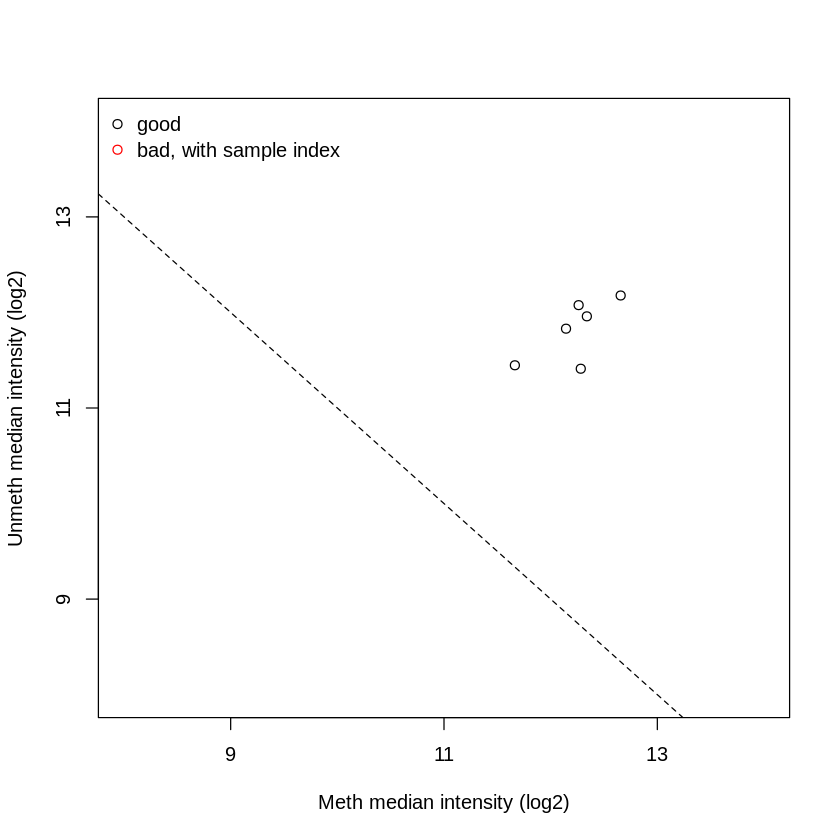

In [97]:
qc <- getQC(MSet)
QCmetrics <- cbind(sheet,qc)

write.csv(QCmetrics, file="phenotype_file_minfiQC.csv", row.names=F, quote=F)

plotQC(qc)

In [99]:
rm(list=ls())

***
# ENmix 

In [1]:
library(ENmix)

library(stringi)
library(magrittr)
library(data.table)
library(svd)
library(purrr)

Loading required package: parallel

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiff

In [2]:
setwd("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")
basedir = getwd()
dataDirectory <- ("/home/iago/Documents/Epigenetica_curso_pipeline/Exercicios/EX3/")

In [3]:
sheet <- read.csv("./phenotype_file.csv")
sheet

GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,undef
GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F
GSM5742876,202702240141_R08C01,GSM5742876_202702240141_R08C01,202702240141,R08C01,M
GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,M
GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,F
GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,M
GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,M


In [4]:
rgSet <- readidat(path = dataDirectory)
rgSet

[readidat] Found 7 files with suffix _Grn.idat

[readidat] Found 7 files with suffix _Red.idat

Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Warning message in readChar(con, nchars = n):
“truncating string with embedded nuls”
Loading required package: IlluminaHumanMethylationEPICmanifest

Loading required package: minfi

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The 

class: rgDataSet 
dim: 1008987 7 
metadata(3): ictrl Array annotation
assays(3): Red Green NBeads
rownames(1008987): 1600101 1600111 ... 99810978 99810992
rowData names(45): Name Address ... Methyl450_Loci Random_Loci
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
Array:  IlluminaHumanMethylationEPIC 
Annotation:  ilm10b2.hg19 

In [5]:
save(rgSet, file="./ENMIX_rgSet.RData")

### quality checks

Vamos criar uma pasta separada para armazenar os gráficos gerados pelo QC do ENmix

In [6]:
system("mkdir ./ENmix-QCgraphs")
setwd("./ENmix-QCgraphs")

plotCtrl(rgSet)
setwd("../")

Plotting  STAINING .jpg 
Plotting  EXTENSION .jpg 
Plotting  HYBRIDIZATION .jpg 
Plotting  TARGET_REMOVAL .jpg 
Plotting  BISULFITE_CONVERSION_I .jpg 
Plotting  BISULFITE_CONVERSION_II .jpg 
Plotting  SPECIFICITY_I .jpg 
Plotting  SPECIFICITY_II .jpg 
Plotting  NON-POLYMORPHIC .jpg 
Plotting  NEGATIVE .jpg 
Plotting  NORM_A .jpg 
Plotting  NORM_C .jpg 
Plotting  NORM_G .jpg 
Plotting  NORM_T .jpg 
Plotting  NORM_ACGT .jpg 


Podemos abrir o nosso explorardor de arquivos e olhar os diversos gráficos para avaliar o compartamento das amostras e, se necessário, excluí-las.
***
#### QCInfo()

In [7]:
qc<-QCinfo(rgSet,detPtype="negative",detPthre=0.000001)

0  samples with percentage of low quality CpG value greater than  0.05  or bisulfite intensity less than  13526.35 
2818  CpGs with percentage of low quality value greater than  0.05 
Ploting qc_sample.jpg ...Done
Ploting qc_CpG.jpg ...Done
Identifying ourlier samples based on beta or total intensity values...
After excluding low quality samples and CpGs
0  samples are outliers based on averaged total intensity value 
1  samples are outliers in beta value distribution 
1  outlier samples were added into badsample list
RECOMMAND: set outlier=FALSE or double check total intensity and beta value 
     distribution plots to confirm
Ploting freqpolygon_beta_beforeQC.jpg ...Done
Ploting freqpolygon_beta_afterQC.jpg ...Done


O QC do ENmix entregou uma amostra marcada como "BadSample" na distribuição beta. Sendo assim, iremos excluí-la.

In [8]:
qc$badsample

[1] "GSM5742876_202702240141_R08C01"

In [9]:
sheet <- subset(sheet, !sheet$Basename %in% qc$badsample)
sheet

,GeoID,SampleID,Basename,Sentrix_ID,Sentrix_Position,Sex
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,GSM5742874,202702240141_R05C01,GSM5742874_202702240141_R05C01,202702240141,R05C01,undef
2,GSM5742875,202702240141_R06C01,GSM5742875_202702240141_R06C01,202702240141,R06C01,F
4,GSM5742877,204088150175_R01C01,GSM5742877_204088150175_R01C01,204088150175,R01C01,M
5,GSM5742878,204088150175_R02C01,GSM5742878_204088150175_R02C01,204088150175,R02C01,F
6,GSM5742879,204088150175_R03C01,GSM5742879_204088150175_R03C01,204088150175,R03C01,M
7,GSM5742880,204088150175_R04C01,GSM5742880_204088150175_R04C01,204088150175,R04C01,M


In [10]:
rgSet

class: rgDataSet 
dim: 1008987 7 
metadata(3): ictrl Array annotation
assays(3): Red Green NBeads
rownames(1008987): 1600101 1600111 ... 99810978 99810992
rowData names(45): Name Address ... Methyl450_Loci Random_Loci
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
Array:  IlluminaHumanMethylationEPIC 
Annotation:  ilm10b2.hg19 

Vamos recriar o rgSet apenas com os indivídios que passaram no QC
### Atenção!!!
* O numero de cores em nCores deve ser escolhido com cautela em computadores pessoais, já que mais cores demandam maior poder computacionao. Isto, pode acabar deixando o seu computador lento.
* Entretanto, em HPCs *(High Performance Computers)* como servidores externos mais poderosos, quanto mais cores disponíveis você puder utilizarmais rápido será o processamento
    * **Recomendado**: 1 a 3 cores em computadores comumns.

***
O processENmix já irá gerar um methylSet corrigido para dye-bias e background correction.

Além disso, ele irá excluir as probes e indivíduos sinalizados como "basamples" ou "badcpgs" indicados no QC.

In [ ]:
mdat <- preprocessENmix(rgSet, bgParaEst="oob", dyeCorr="RELIC",
                      QCinfo=qc, nCores=3)

In [12]:
mdat

class: methDataSet 
dim: 863332 6 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(863332): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(6): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
PreprocessMethod:  Backgroud_corr: ENmix,oob dyeBiasCorrection: RELIC 

***
Para obter um MethylSet sem nenhuma correção, vc pode usar o getMeth()

In [13]:
mraw <- getmeth(rgSet)

In [14]:
mraw

class: methDataSet 
dim: 866150 7 
metadata(1): preprocessMethod
assays(2): Meth Unmeth
rownames(866150): cg00000622 cg00001245 ... cg06284364 cg05688618
rowData names(46): Name AddressA ... Methyl450_Loci Random_Loci
colnames(7): GSM5742874_202702240141_R05C01
  GSM5742875_202702240141_R06C01 ... GSM5742879_204088150175_R03C01
  GSM5742880_204088150175_R04C01
colData names(0):
PreprocessMethod:   